# Years2Salary for Developers

## Install Libraries

In [2]:
!pip install numpy pandas matplotlib scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Generate Data for test and train

In [ ]:
np.random.seed(42)
        # 0                 1                 2
fields = ['Web Developer', 'Data Scientist', 'Mobile Developer', 'Backend Engineer', 'Frontend Engineer', 'AI Engineer']
data = {
    'Experience': [],
    'Salary': [],
    'Field': []
}

for field in fields: # Web Developer
    for expYears in range(1, 11):  # 1 2 ...... # 10 
        if field == 'Web Developer':
            baseSalary = 5000
            increment = 2000
        elif field == 'Data Scientist':
            baseSalary = 8000
            increment = 3000
        elif field == 'Mobile Developer':
            baseSalary = 6000
            increment = 2200
        elif field == 'Backend Engineer':
            baseSalary = 7000
            increment = 2500
        elif field == 'Frontend Engineer':
            baseSalary = 5500
            increment = 2100
        elif field == 'AI Engineer':
            baseSalary = 9000
            increment = 3500

                # 5000 + 2 * 2000 + (-1000, 1000)
        salary = baseSalary + (expYears * increment) + np.random.randint(-1000, 1000) 
        data['Experience'].append(expYears) # 1 # 2
        data['Salary'].append(salary) # 7000  # 9000
        data['Field'].append(field) # Web Developer # Web Developer

df = pd.DataFrame(data)
print(df.head())
print(df.tail())

# This just a test for dataset
# print(df)



   Experience  Salary          Field
0           1    7126  Web Developer
1           2    9459  Web Developer
2           3   10860  Web Developer
3           4   13294  Web Developer
4           5   15130  Web Developer
    Experience  Salary        Field
55           6   29831  AI Engineer
56           7   34028  AI Engineer
57           8   37154  AI Engineer
58           9   41008  AI Engineer
59          10   44842  AI Engineer


## Display the avilable fields

In [ ]:
def DisplayFields(fields):
  print('\nAvailable Fields: ')

  for index, field in enumerate(fields):
    print(f'{index+1}. {field}')
  print('0. Exit')

DisplayFields(fields) 


Available Fields: 
1. Web Developer
2. Data Scientist
3. Mobile Developer
4. Backend Engineer
5. Frontend Engineer
6. AI Engineer
0. Exit


## Run the program to select the field

### Steps:

1.   Display all fields & recieve input (Field that user work on it) from the user.
2.   Make validation on the user's choice.
3.   Retreive from the dataset all the rows related to input choice.
4.   Prepare the data for trainnig by making the input (x) as 2D array and prepare the expected output (y) from our dataset.
5.   Split the data into 2 sets one for training (80%) and the other for testing (20%).
6.   Train the model.
7.   Test the model.
8.   Draw the result.
9.   Print Linear regression equation y = b0x + b1, b1 is the coefficient and b0 is the intercept with y axis.
10.  Recieve num of experience year and Predict the new salary.



Available Fields: 
1. Web Developer
2. Data Scientist
3. Mobile Developer
4. Backend Engineer
5. Frontend Engineer
6. AI Engineer
0. Exit

Enter your choice or press 0 to exit: 1

You selected: Web Developer


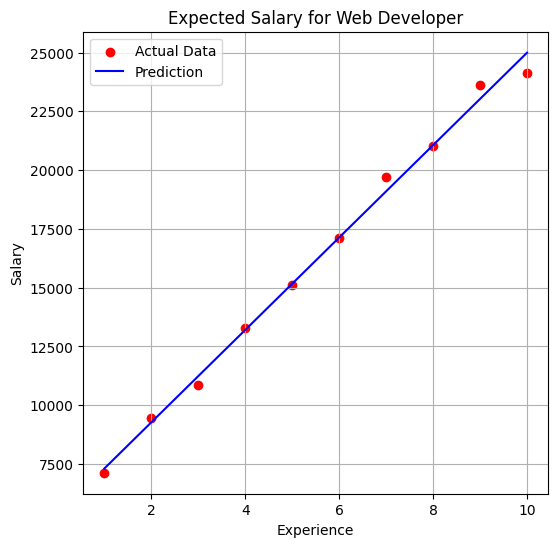


Equation of the line: salary = 1965.96 * experience + 5336.33

Enter years of experience to predict salary (or type 'back' to choose another field): 20

Predicted Salary for 20 years of experience: 44655.48

-----------------------------------------------------------------------------------------

Available Fields: 
1. Web Developer
2. Data Scientist
3. Mobile Developer
4. Backend Engineer
5. Frontend Engineer
6. AI Engineer
0. Exit

Enter your choice or press 0 to exit: 2

You selected: Data Scientist


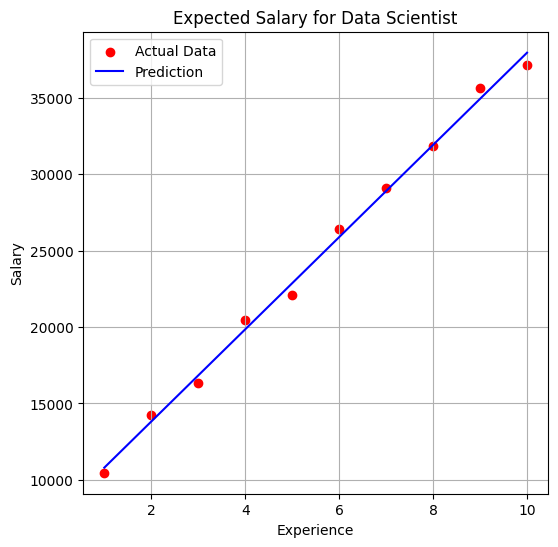


Equation of the line: salary = 3018.52 * experience + 7779.13

Enter years of experience to predict salary (or type 'back' to choose another field): back

Available Fields: 
1. Web Developer
2. Data Scientist
3. Mobile Developer
4. Backend Engineer
5. Frontend Engineer
6. AI Engineer
0. Exit


KeyboardInterrupt: Interrupted by user

In [ ]:
while True:
  DisplayFields(fields)
  choice = input('\nEnter your choice or press 0 to exit: ') # "-1" -> -1 

  # Make validation on the choice
  if not choice.isdigit() or int(choice) < 0 or int(choice) > len(fields):
    print('!!! Invalid choice, Please try again.')
    continue

  choice = int(choice)

  if choice == 0:
    break

  selectedField = fields[choice-1] # [0]
  print(f'\nYou selected: {selectedField}') # Web Developer 

  # Retreive all the row related to the selected field
  dfSelected = df[df['Field'] == selectedField] # Web Developer 

  # Prepare the data for training
  x = dfSelected['Experience'].values.reshape(-1, 1) # INPUT
  y = dfSelected['Salary'].values # OUTPUT

  # Train the model
  model = LinearRegression()
  model.fit(x, y) # base + exp * incre + random values (-1000,1000)
  y_pred = model.predict(x)

  # Draw the Results
  plt.figure(figsize=(6,6))
  plt.scatter(x, y, color='red', label='Actual Data')
  plt.plot(x, y_pred, color='Blue', label='Prediction')
  plt.xlabel('Experience')
  plt.ylabel('Salary')
  plt.title(f'Expected Salary for {selectedField}')
  plt.legend()
  plt.grid(True)

  plt.show()
  plt.pause(5)
  plt.close()

                # y = 2000 * x + 5000 -> if x = 1 then y = 7000
  # The equation: y = b0x + b1
  print(f"\nEquation of the line: salary = {model.coef_[0]:.2f} * experience + {model.intercept_:.2f}")

  # Predict the new salary for the entered experience
  while True:
    experienceInput = input('\nEnter years of experience to predict salary (or type \'back\' to choose another field): ')

    if experienceInput.lower() == 'back':
      break

    if not experienceInput.isdigit() or int(experienceInput) < 0:
      print('!!! Invalid input, Please try again.')
      continue

    experienceInput = int(experienceInput)
    predicatedSalary = model.predict([[experienceInput]])
    print(f'\nPredicted Salary for {experienceInput} years of experience: {predicatedSalary[0]:.2f}')
    print('\n-----------------------------------------------------------------------------------------')
    break
